In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
# download mnist dataset
mnist = keras.datasets.mnist

11490434/11490434 [==============================] - 2s 0us/step


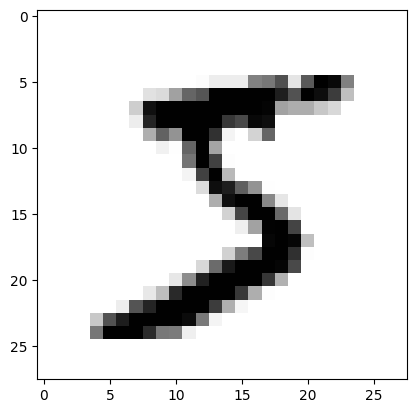

In [4]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plot the first image in the dataset
plt.imshow(x_train[0], cmap=plt.cm.binary)


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
x_train[0].shape

(28, 28)

In [11]:
def build_cnn_model(input_width, input_height, input_channels, output_dim):
    cnn_model = keras.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, input_shape=(input_width, input_height, input_channels)),
        keras.layers.MaxPooling2D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(output_dim, activation=tf.nn.softmax)
    ])
    cnn_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
    return cnn_model

In [15]:
input_width = 28
input_height = 28
input_channels = 1 # grayscale images have 1 channel
output_dim = 10 # 10 digits to classify
my_cnn_model = build_cnn_model(input_width, input_height, input_channels, output_dim)


In [ ]:
# train the model
train_history = my_cnn_model.fit(x_train, y_train, epochs=5)

In [18]:
print(train_history.history)

{'loss': [0.3704453408718109, 0.07241718471050262, 0.052398815751075745, 0.0427434965968132, 0.03165318816900253], 'accuracy': [0.94118332862854, 0.9781333208084106, 0.9838166832923889, 0.9869999885559082, 0.9904666543006897]}


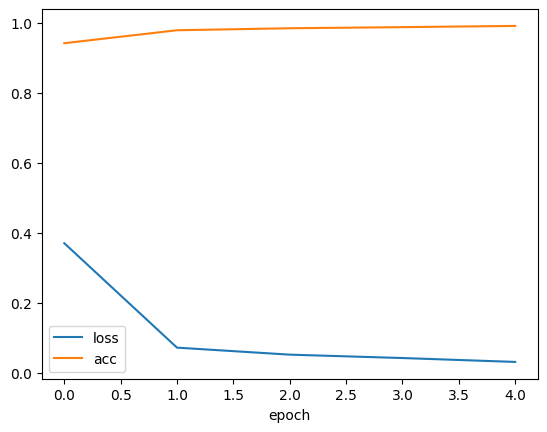

In [19]:
# plot the training loss and accuracy in one figure
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['accuracy'])
plt.legend(['loss', 'acc'])
plt.xlabel('epoch')
plt.show()

In [20]:
# evaluate the model on test set

test_loss, test_acc = my_cnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.0862 - accuracy: 0.9780
Test accuracy: 0.9779999852180481
Test loss: 0.08621664345264435


In [21]:
# evaluate with confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = my_cnn_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

313/313 [==============================] - 1s 4ms/step
[[ 966    2    0    0    0    1    6    2    2    1]
 [   0 1125    1    1    1    0    2    3    2    0]
 [   2    9  992    4    1    0    1   14    8    1]
 [   0    0    0  971    0   24    0    4    5    6]
 [   1    1    0    0  971    0    4    0    0    5]
 [   1    0    0    2    0  877    6    0    2    4]
 [   6    4    1    0    1    4  941    0    1    0]
 [   0    1    3    3    6    0    0 1009    1    5]
 [   4    1    2    3    8    2    0    3  947    4]
 [   1    2    0    1   11    2    0    6    5  981]]


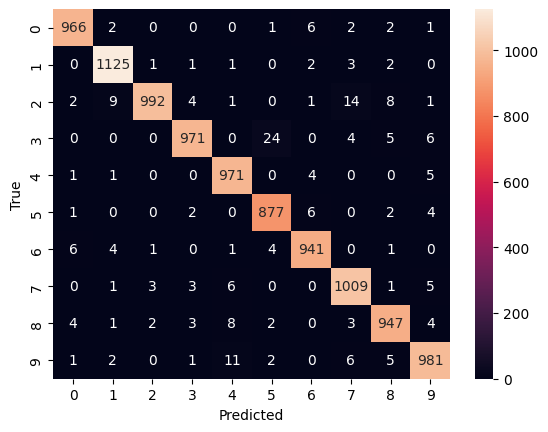

In [22]:
# plot the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
# save the model
my_cnn_model.save('my_cnn_model.h5')

In [24]:
# load the model

from tensorflow.keras.models import load_model

loaded_model = load_model('my_cnn_model.h5')

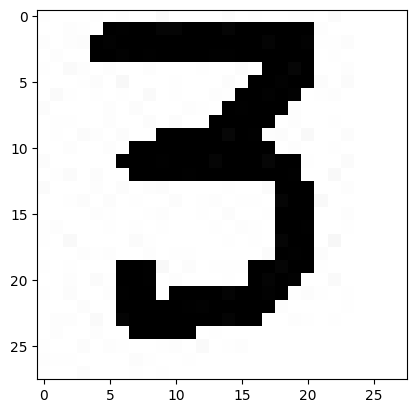

In [27]:
# load data/3.jpg image and predict
import cv2
import numpy as np

img = cv2.imread('data/3.jpg', cv2.IMREAD_GRAYSCALE)      
img = cv2.resize(img, (28, 28))
img = np.array(img).reshape((1, 28, 28, 1))

#plot the image
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

In [29]:
# predict
pred = loaded_model.predict(img)
print(pred)
print(np.argmax(pred))

1/1 [==============================] - 0s 21ms/step
[[8.24015674e-14 8.56745288e-08 1.78088420e-13 8.86818707e-01
  1.33669200e-15 1.11378305e-01 3.73526475e-18 1.47680950e-03
  1.45842106e-11 3.26147623e-04]]
3
